In [1]:
# https://automating-gis-processes.github.io/2017/lessons/L3/geocoding.html

In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import os

# Filepath
fp = "addresses.txt"


In [ ]:
from shapely.geometry import Point, Polygon, MultiPolygon

In [3]:
# cwd = os.getcwd()

In [4]:
# os.chdir('C:\\Users\\edwar\\Documents\\Python\\DS6011') 

In [5]:
# os.getcwd()

'C:\\Users\\edwar\\Documents\\Python\\DS6011'

In [6]:
# Read the data (from example)
data = pd.read_csv('addresses.txt', sep=';')

In [31]:
# read in our dataset
df=pd.read_csv('test_data.csv')

In [32]:
data.head(3)

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"


In [33]:
df.head(3)

,Unnamed: 0,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,...,Fifeville,Jefferson Park Avenue,UVA Darden/Law/JPJ,Lewis Mountain,The Meadows,UVA Lambeth,Greenbrier,Woolen Mills,Martha Jefferson,geometry
0,0,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.017795 -78.517822)
1,1,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.017795 -78.517822)
2,2,2016-00006845,2017-01-01 00:00:00,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.017795 -78.517822)


In [35]:
#clean up our data to play with
df = df[['Incident Number', 'Basic Incident Full Address', 'Basic Incident Geocoded Latitude', 'Basic Incident Geocoded Longitude']].copy()
df = df.drop_duplicates()
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)
df

,Incident Number,Basic Incident Full Address,Basic Incident Geocoded Latitude,Basic Incident Geocoded Longitude
0,2016-00006845,2627 Jefferson Park Charlottesville VA 22903,38.017795,-78.517822
1,2017-00000006,206 HARTMANS MILL Charlottesville VA 22902,38.020247,-78.488447
2,2017-00000007,102 14TH Northwest Charlottesville VA 22903,38.034384,-78.499341
3,2017-00000012,2307 North BERKSHIRE B Charlottesville VA 22901,38.063451,-78.497554
4,2017-00000014,1311 CARLTON Charlottesville VA 22902,38.022725,-78.468439
5,2017-00000015,2507 PLATEAU A Charlottesville VA 22903,38.025511,-78.520957
6,2017-00000018,105 North Emmett 216 Charlottesville VA 22903,38.040456,-78.506433
7,2017-00000020,475 RIDGE MCINTIRE Charlottesville VA 22903,38.032917,-78.484674
8,2017-00000021,313 2ND Southeast 100 Charlottesville VA 22902,38.028875,-78.480888
9,2017-00000025,1321 West MAIN Charlottesville VA 22903,38.033908,-78.498291


In [ ]:
# !pip install geopy

In [13]:
#example didn't have lat long, used a open street maps to make it work

# this is kind of a magic step, as this takes in a pandas data frame and spits out a geopandas df

# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses with Nominatim backend

#this needs addresses with commas in it I think
geo = geocode(data['addr'], provider='nominatim', user_agent="ET_test")
geo

,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.93169 60.16902),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust..."
3,POINT (24.97759 60.19361),"Hermannin rantatie, Hermanninmäki, Hermanni, K..."
4,POINT (24.92160 60.15665),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län..."
5,POINT (25.08174 60.23522),"18, Kontulantie, Kontula, Mellunkylä, Itäinen ..."
6,POINT (25.10985 60.22126),"Itäväylä, Vartioharju, Vartiokylä, Itäinen suu..."
7,POINT (25.03008 60.27856),"Tapulikaupungintie, Tapulikaupunki, Suutarila,..."
8,POINT (25.02880 60.26323),"Sompionpolku, Fallkullan kiila, Tapanila, Tapa..."
9,POINT (24.87197 60.22244),"5, Atomitie, Pitäjänmäen teollisuusalue, Pitäj..."


In [99]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [38]:
join = geo.join(data)
join

,geometry,address,id,addr
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,POINT (24.93169 60.16902),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...",1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,POINT (24.97759 60.19361),"Hermannin rantatie, Hermanninmäki, Hermanni, K...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,POINT (24.92160 60.15665),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"
5,POINT (25.08174 60.23522),"18, Kontulantie, Kontula, Mellunkylä, Itäinen ...",1006,"Kontulantie 18, 00940 Helsinki, Finland"
6,POINT (25.10985 60.22126),"Itäväylä, Vartioharju, Vartiokylä, Itäinen suu...",1007,"Itäväylä 3, 00950 Helsinki, Finland"
7,POINT (25.03008 60.27856),"Tapulikaupungintie, Tapulikaupunki, Suutarila,...",1008,"Tapulikaupungintie 3, 00750 Helsinki, Finland"
8,POINT (25.02880 60.26323),"Sompionpolku, Fallkullan kiila, Tapanila, Tapa...",1009,"Sompionpolku 2, 00730 Helsinki, Finland"
9,POINT (24.87197 60.22244),"5, Atomitie, Pitäjänmäen teollisuusalue, Pitäj...",1010,"Atomitie 5, 00370 Helsinki, Finland"


In [ ]:
#this is how we can make make a geopandas df with our lat/long info.

#this function is strange to me as it takes long/lat, basically backward from how I think

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Basic Incident Geocoded Longitude'], df['Basic Incident Geocoded Latitude']))
gdf

In [83]:
# we get a geopands out
type(gdf)

geopandas.geodataframe.GeoDataFrame

we'll no longer need our orginal df

In [39]:
#saving the example file so you don't have to go back to open street maps

# Output file path
outfp = "addresses.shp"

# Save to Shapefile
join.to_file(outfp)

Second module example

In [ ]:
#https://automating-gis-processes.github.io/2017/lessons/L3/point-in-polygon.html

In [101]:
# import geopandas as gpd
fp = "addresses.shp"

#this is the key step... its not pd.read, it is gpd read, making it a geopandas file
data = gpd.read_file(fp)

In [41]:
data.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
3,"Hermannin rantatie, Hermanninmäki, Hermanni, K...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97759 60.19361)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [42]:
#add kml support to gpd
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [43]:
# Filepath to KML file
fp = "PKS_suuralue.kml"

In [44]:
#read the KML
polys = gpd.read_file(fp, driver='KML')
polys

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."
5,Kauniainen,,"POLYGON Z ((24.69075 60.21958 0.00000, 24.6924..."
6,Suur-Leppävaara,,"POLYGON Z ((24.79747 60.20827 0.00000, 24.7954..."
7,Suur-Tapiola,,"POLYGON Z ((24.84436 60.16598 0.00000, 24.8443..."
8,Myyrmäki,,"POLYGON Z ((24.82459 60.29025 0.00000, 24.8243..."
9,Kivistö,,"POLYGON Z ((24.94309 60.33845 0.00000, 24.9421..."


In [45]:
#read the KML for cville

polys2 = gpd.read_file('doc.kml', driver='KML')
polys2

,Name,Description,geometry
0,10th & Page,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49092 38.03864 0.00000, ..."
1,UVA Fontaine,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.52320 38.02615 0.00000, ..."
2,Johnson Village,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49682 38.01781 0.00000, ..."
3,Barracks / Rugby,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.48911 38.05672 0.00000, ..."
4,UVA International Residential College,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50634 38.03960 0.00000, ..."
5,UVA Old Medical Grounds,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49829 38.03337 0.00000, ..."
6,UVA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49691 38.03302 0.00000, ..."
7,Locust Grove,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.45856 38.03448 0.00000, ..."
8,Belmont,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.46963 38.01178 0.00000, ..."
9,Fry's Spring,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50322 38.02426 0.00000, ..."


In [46]:
#dump the county to make the map smaller
polys3 = polys2.drop([14])
polys3.reset_index(inplace = True)
polys3.drop(columns = 'index', axis = 1, inplace = True)
polys3

,Name,Description,geometry
0,10th & Page,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49092 38.03864 0.00000, ..."
1,UVA Fontaine,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.52320 38.02615 0.00000, ..."
2,Johnson Village,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49682 38.01781 0.00000, ..."
3,Barracks / Rugby,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.48911 38.05672 0.00000, ..."
4,UVA International Residential College,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50634 38.03960 0.00000, ..."
5,UVA Old Medical Grounds,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49829 38.03337 0.00000, ..."
6,UVA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49691 38.03302 0.00000, ..."
7,Locust Grove,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.45856 38.03448 0.00000, ..."
8,Belmont,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.46963 38.01178 0.00000, ..."
9,Fry's Spring,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50322 38.02426 0.00000, ..."


![CFD Neigherborhood Map](hood_map.jpg)

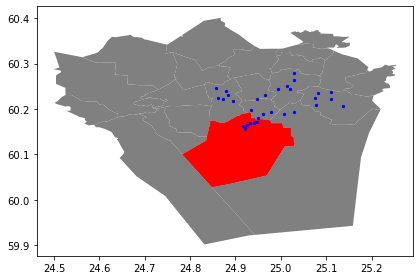

In [102]:
southern = polys[polys['Name']=='Eteläinen']
southern.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
data2.plot(ax=ax, color='blue', markersize=5); #was data.plot
plt.tight_layout();

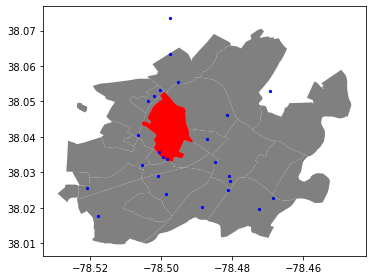

In [89]:
#all the only works on a GEOPANDAS DF, not a regular pandas DF

cville = polys3[polys3['Name']=='Venable']
cville.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys3.plot(ax=ax, facecolor='gray');
cville.plot(ax=ax, facecolor='red');
gdf.plot(ax=ax, color='blue', markersize=5);
plt.tight_layout();

In [90]:
#i'm not sure why this is necessary but its in the example

import shapely.speedups

shapely.speedups.enable()

In [91]:
pip_mask = data.within(southern.loc[0, 'geometry'])

print(pip_mask)

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool


In [93]:
pip_mask2 = gdf.within(cville.loc[0, 'geometry'])

print(pip_mask2)

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
dtype: bool


In [94]:
pip_data = data.loc[pip_mask]
pip_data

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)
10,"Rautatientori, Kaisaniemi, Kluuvi, Eteläinen s...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.94410 60.17133)
30,"Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...",1031,"Urho Kekkosen katu 1, 00100 Helsinki, Finland",POINT (24.93312 60.16909)
31,"Ruoholahdenkatu, Hietalahti, Kamppi, Eteläinen...",1032,"Ruoholahdenkatu 17, 00101 Helsinki, Finland",POINT (24.92520 60.16489)
32,"Easy Cycles, 3, Tyynenmerenkatu, Jätkäsaari, L...",1033,"Tyynenmerenkatu 3, 00220 Helsinki, Finland",POINT (24.92119 60.15890)
33,"Oluthuone Kaisla, 4, Vilhonkatu, Kaisaniemi, K...",1034,"Vilhonkatu 4, 00101 Helsinki, Finland",POINT (24.94709 60.17191)


In [96]:
pip_data2 = gdf.loc[pip_mask2]
pip_data2

,Incident Number,Basic Incident Full Address,Basic Incident Geocoded Latitude,Basic Incident Geocoded Longitude,geometry
2,2017-00000007,102 14TH Northwest Charlottesville VA 22903,38.034384,-78.499341,POINT (-78.49934 38.03438)
9,2017-00000025,1321 West MAIN Charlottesville VA 22903,38.033908,-78.498291,POINT (-78.49829 38.03391)
23,2017-00000064,1611 UNIVERSITY Charlottesville VA 22903,38.035864,-78.500699,POINT (-78.50070 38.03586)


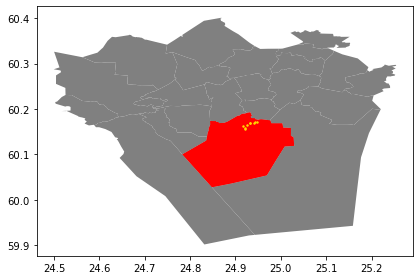

In [97]:
southern = polys[polys['Name']=='Eteläinen']
southern.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
pip_data.plot(ax=ax, color='gold', markersize=2);
plt.tight_layout()

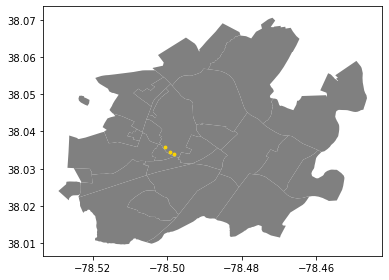

In [285]:
cville = polys3[polys3['Name']=='Venable']
cville.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys3.plot(ax=ax, facecolor='gray');
cville.plot(ax=ax, facecolor='red');
pip_data2.plot(ax=ax, color='gold', markersize=8);
plt.tight_layout();

now... can we assign neigherborhood based on the data


In [118]:
p1 = pip_data2.iloc[2]['geometry']
print(p1.x)
print(p1.y)

-78.500699
38.035864


In [113]:
test_poly = polys3[polys3['Name']=='Venable']
test_poly2 = test_poly['geometry']
test_poly2

18    MULTIPOLYGON Z (((-78.49861 38.05227 0.00000, ...
Name: geometry, dtype: geometry

In [120]:
test_poly2.contains(p1)

18    True
dtype: bool

In [121]:
gdf.head(4)

,Incident Number,Basic Incident Full Address,Basic Incident Geocoded Latitude,Basic Incident Geocoded Longitude,geometry
0,2016-00006845,2627 Jefferson Park Charlottesville VA 22903,38.017795,-78.517822,POINT (-78.51782 38.01779)
1,2017-00000006,206 HARTMANS MILL Charlottesville VA 22902,38.020247,-78.488447,POINT (-78.48845 38.02025)
2,2017-00000007,102 14TH Northwest Charlottesville VA 22903,38.034384,-78.499341,POINT (-78.49934 38.03438)
3,2017-00000012,2307 North BERKSHIRE B Charlottesville VA 22901,38.063451,-78.497554,POINT (-78.49755 38.06345)


In [122]:
polys3.head(2)

,Name,Description,geometry
0,10th & Page,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49092 38.03864 0.00000, ..."
1,UVA Fontaine,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.52320 38.02615 0.00000, ..."


In [124]:
polys3.Name.to_list()

['10th & Page',
 'UVA Fontaine',
 'Johnson Village',
 'Barracks / Rugby',
 'UVA International Residential College',
 'UVA Old Medical Grounds',
 'UVA',
 'Locust Grove',
 'Belmont',
 "Fry's Spring",
 'UVA Main Grounds',
 'Starr Hill',
 'North Downtown',
 'Barracks Road',
 'Rose Hill',
 'UVA Ivy',
 'UVA Piedmont Faculty',
 'UVA Carruthers Hall',
 'Venable',
 'Ridge Street',
 'Fifeville',
 'Jefferson Park Avenue',
 'UVA Darden/Law/JPJ',
 'Lewis Mountain',
 'The Meadows',
 'UVA Lambeth',
 'Greenbrier',
 'Woolen Mills',
 'Martha Jefferson']

In [125]:
name_list = polys3.Name.to_list()

In [126]:
for n in name_list:
    gdf[n] = np.NaN

In [127]:
gdf.head(2)

,Incident Number,Basic Incident Full Address,Basic Incident Geocoded Latitude,Basic Incident Geocoded Longitude,geometry,10th & Page,UVA Fontaine,Johnson Village,Barracks / Rugby,UVA International Residential College,...,Ridge Street,Fifeville,Jefferson Park Avenue,UVA Darden/Law/JPJ,Lewis Mountain,The Meadows,UVA Lambeth,Greenbrier,Woolen Mills,Martha Jefferson
0,2016-00006845,2627 Jefferson Park Charlottesville VA 22903,38.017795,-78.517822,POINT (-78.51782 38.01779),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-00000006,206 HARTMANS MILL Charlottesville VA 22902,38.020247,-78.488447,POINT (-78.48845 38.02025),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
polys3

,Name,Description,geometry
0,10th & Page,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49092 38.03864 0.00000, ..."
1,UVA Fontaine,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.52320 38.02615 0.00000, ..."
2,Johnson Village,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49682 38.01781 0.00000, ..."
3,Barracks / Rugby,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.48911 38.05672 0.00000, ..."
4,UVA International Residential College,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50634 38.03960 0.00000, ..."
5,UVA Old Medical Grounds,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49829 38.03337 0.00000, ..."
6,UVA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49691 38.03302 0.00000, ..."
7,Locust Grove,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.45856 38.03448 0.00000, ..."
8,Belmont,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.46963 38.01178 0.00000, ..."
9,Fry's Spring,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50322 38.02426 0.00000, ..."


In [157]:
hood_dict = {}

In [165]:
for i in polys3.index:
#     print(polys3.iloc[i].geometry)
     hood_dict[polys3.iloc[i].Name] = polys3.iloc[i].geometry

In [166]:
hood_dict

{'10th & Page': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5ad3d250>,
 'UVA Fontaine': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5828a340>,
 'Johnson Village': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5ad3d580>,
 'Barracks / Rugby': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5ad3d760>,
 'UVA International Residential College': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5ad3d7c0>,
 'UVA Old Medical Grounds': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5af0e5b0>,
 'UVA': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5b9a30d0>,
 'Locust Grove': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5b9a3100>,
 'Belmont': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5b9a31c0>,
 "Fry's Spring": <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5b9a31f0>,
 'UVA Main Grounds': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5b9a3280>,
 'Starr Hill': <shapely.geometry.multipolygon.MultiPolygon at 0x1ba5b9a32e0>,
 'North Do

In [221]:
hpoly0 = hood_dict['10th & Page']
def hood0(point):
    test_val = hpoly0.contains(point)
    return test_val


In [222]:
hpoly1 = hood_dict['UVA Fontaine']
def hood1(point):
    test_val = hpoly1.contains(point)
    return test_val


In [223]:
hpoly2 = hood_dict['Johnson Village']
def hood2(point):
    test_val = hpoly2.contains(point)
    return test_val


In [224]:
hpoly3 = hood_dict['Barracks / Rugby']
def hood3(point):
    test_val = hpoly3.contains(point)
    return test_val


In [225]:
hpoly4 = hood_dict['UVA International Residential College']
def hood4(point):
    test_val = hpoly18.contains(point)
    return test_val


In [226]:
hpoly5 = hood_dict['UVA Old Medical Grounds']
def hood5(point):
    test_val = hpoly5.contains(point)
    return test_val


In [227]:
hpoly6 = hood_dict['UVA']
def hood6(point):
    test_val = hpoly6.contains(point)
    return test_val

In [228]:
hpoly7 = hood_dict['Locust Grove']
def hood7(point):
    test_val = hpoly7.contains(point)
    return test_val


In [229]:
hpoly8 = hood_dict['Belmont']
def hood8(point):
    test_val = hpoly8.contains(point)
    return test_val


In [230]:
hpoly9 = hood_dict["Fry's Spring"]
def hood9(point):
    test_val = hpoly9.contains(point)
    return test_val


In [231]:
hpoly10 = hood_dict['UVA Main Grounds']
def hood10(point):
    test_val = hpoly10.contains(point)
    return test_val

 

In [232]:
hpoly11 = hood_dict['Starr Hill']
def hood11(point):
    test_val = hpoly11.contains(point)
    return test_val


In [233]:
hpoly12 = hood_dict['North Downtown']
def hood12(point):
    test_val = hpoly12.contains(point)
    return test_val


In [234]:
hpoly13 = hood_dict['Barracks Road']
def hood13(point):
    test_val = hpoly13.contains(point)
    return test_val

In [235]:
hpoly14 = hood_dict['Rose Hill']
def hood14(point):
    test_val = hpoly14.contains(point)
    return test_val


In [236]:
hpoly15 = hood_dict['UVA Ivy']
def hood15(point):
    test_val = hpoly15.contains(point)
    return test_val


In [237]:
hpoly16 = hood_dict['UVA Piedmont Faculty']
def hood16(point):
    test_val = hpoly16.contains(point)
    return test_val

In [238]:
hpoly17 = hood_dict['UVA Carruthers Hall']
def hood17(point):
    test_val = hpoly17.contains(point)
    return test_val


In [239]:
hpoly18 = hood_dict['Venable']
def hood18(point):
    test_val = hpoly18.contains(point)
    return test_val


In [240]:
hpoly19 = hood_dict['Ridge Street']
def hood19(point):
    test_val = hpoly19.contains(point)
    return test_val

In [241]:
hpoly20 = hood_dict['Fifeville']
def hood20(point):
    test_val = hpoly20.contains(point)
    return test_val

In [242]:
hpoly21 = hood_dict['Jefferson Park Avenue']
def hood21(point):
    test_val = hpoly21.contains(point)
    return test_val

In [243]:
hpoly22 = hood_dict['UVA Darden/Law/JPJ']
def hood22(point):
    test_val = hpoly22.contains(point)
    return test_val

In [244]:
hpoly23 = hood_dict['Lewis Mountain']
def hood23(point):
    test_val = hpoly23.contains(point)
    return test_val

In [245]:
hpoly24 = hood_dict['The Meadows']
def hood24(point):
    test_val = hpoly24.contains(point)
    return test_val

In [246]:
hpoly25 = hood_dict['UVA Lambeth']
def hood25(point):
    test_val = hpoly25.contains(point)
    return test_val

In [247]:
hpoly26 = hood_dict['Greenbrier']
def hood26(point):
    test_val = hpoly26.contains(point)
    return test_val

In [248]:
hpoly27 = hood_dict['Woolen Mills']
def hood27(point):
    test_val = hpoly27.contains(point)
    return test_val

In [249]:
hpoly28 = hood_dict['Martha Jefferson']
def hood28(point):
    test_val = hpoly28.contains(point)
    return test_val

In [250]:
# hood18(p1)

In [251]:
# s.apply(square)

In [252]:
# gdf['10th & Page']

In [253]:
gdf['10th & Page'] = gdf.geometry.apply(hood0)
gdf['UVA Fontaine'] = gdf.geometry.apply(hood1)
gdf['Johnson Village'] = gdf.geometry.apply(hood2)
gdf['Barracks / Rugby'] = gdf.geometry.apply(hood3)
gdf['UVA International Residential College'] = gdf.geometry.apply(hood4)
gdf['UVA Old Medical Grounds'] = gdf.geometry.apply(hood5)
gdf['UVA'] = gdf.geometry.apply(hood6)
gdf['Locust Grove'] = gdf.geometry.apply(hood7)
gdf['Belmont'] = gdf.geometry.apply(hood8)
gdf["Fry's Spring"] = gdf.geometry.apply(hood9)
gdf['UVA Main Grounds'] = gdf.geometry.apply(hood10)
gdf['Starr Hill'] = gdf.geometry.apply(hood11)
gdf['North Downtown'] = gdf.geometry.apply(hood12)
gdf['Barracks Road'] = gdf.geometry.apply(hood13)
gdf['Rose Hill'] = gdf.geometry.apply(hood14)
gdf['UVA Ivy'] = gdf.geometry.apply(hood15)
gdf['UVA Piedmont Faculty'] = gdf.geometry.apply(hood16)
gdf['UVA Carruthers Hall'] = gdf.geometry.apply(hood17)
gdf['Venable'] = gdf.geometry.apply(hood18)
gdf['Ridge Street'] = gdf.geometry.apply(hood19)
gdf['Fifeville'] = gdf.geometry.apply(hood20)
gdf['Jefferson Park Avenue'] = gdf.geometry.apply(hood21)
gdf['UVA Darden/Law/JPJ'] = gdf.geometry.apply(hood22)
gdf['Lewis Mountain'] = gdf.geometry.apply(hood23)
gdf['The Meadows'] = gdf.geometry.apply(hood24)
gdf['UVA Lambeth'] = gdf.geometry.apply(hood25)
gdf['Greenbrier'] = gdf.geometry.apply(hood26)
gdf['Woolen Mills'] = gdf.geometry.apply(hood27)
gdf['Martha Jefferson'] = gdf.geometry.apply(hood28)

In [254]:
gdf

,Incident Number,Basic Incident Full Address,Basic Incident Geocoded Latitude,Basic Incident Geocoded Longitude,geometry,10th & Page,UVA Fontaine,Johnson Village,Barracks / Rugby,UVA International Residential College,...,Ridge Street,Fifeville,Jefferson Park Avenue,UVA Darden/Law/JPJ,Lewis Mountain,The Meadows,UVA Lambeth,Greenbrier,Woolen Mills,Martha Jefferson
0,2016-00006845,2627 Jefferson Park Charlottesville VA 22903,38.017795,-78.517822,POINT (-78.51782 38.01779),False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2017-00000006,206 HARTMANS MILL Charlottesville VA 22902,38.020247,-78.488447,POINT (-78.48845 38.02025),False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2017-00000007,102 14TH Northwest Charlottesville VA 22903,38.034384,-78.499341,POINT (-78.49934 38.03438),False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017-00000012,2307 North BERKSHIRE B Charlottesville VA 22901,38.063451,-78.497554,POINT (-78.49755 38.06345),False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2017-00000014,1311 CARLTON Charlottesville VA 22902,38.022725,-78.468439,POINT (-78.46844 38.02273),False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2017-00000015,2507 PLATEAU A Charlottesville VA 22903,38.025511,-78.520957,POINT (-78.52096 38.02551),False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,2017-00000018,105 North Emmett 216 Charlottesville VA 22903,38.040456,-78.506433,POINT (-78.50643 38.04046),False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,2017-00000020,475 RIDGE MCINTIRE Charlottesville VA 22903,38.032917,-78.484674,POINT (-78.48467 38.03292),False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2017-00000021,313 2ND Southeast 100 Charlottesville VA 22902,38.028875,-78.480888,POINT (-78.48089 38.02887),False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2017-00000025,1321 West MAIN Charlottesville VA 22903,38.033908,-78.498291,POINT (-78.49829 38.03391),False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Test seems to work... lets try the full set

In [255]:
# read in our dataset
df_full=pd.read_excel('CFD_NFIRS_1_1_17to_6_25_21.xlsx')

In [259]:
gdf_full = gpd.GeoDataFrame(df_full, geometry=gpd.points_from_xy(df_full['Basic Incident Geocoded Longitude'], df_full['Basic Incident Geocoded Latitude']))
gdf_full

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Use Code And Description,Basic Shift Or Platoon,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,geometry
0,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN,POINT (-78.51782 38.01779)
1,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN,POINT (-78.51782 38.01779)
2,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN,POINT (-78.51782 38.01779)
3,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN,POINT (-78.51782 38.01779)
4,2017-00000006,2017-01-01,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,"962 - Residential street, road or residential ...","""A"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN,POINT (-78.48845 38.02025)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107723,2021-00005152,2021-06-25,19,Investigate,NaN,2021-06-25 19:27:28,2,NaN,4.73,2021-06-25 19:23:11,...,331 - Hospital - medical or psychiatric,"""C"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN,POINT (-78.49855 38.03103)
107724,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN,POINT (-78.48480 38.02985)
107725,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN,POINT (-78.48480 38.02985)
107726,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN,POINT (-78.48480 38.02985)


In [42]:
#already did this

#add kml support to gpd
# gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [256]:
#already done
#read the KML for cville

# polys2 = gpd.read_file('doc.kml', driver='KML')
# polys2

In [267]:
#and this
#dump the county to make the map smaller
# polys3 = polys2.drop([14])
# polys3.reset_index(inplace = True)
# polys3.drop(columns = 'index', axis = 1, inplace = True)
# polys3

In [268]:
# add columns
for n in name_list:
    gdf_full[n] = np.NaN

In [269]:
gdf_full['10th & Page'] = gdf_full.geometry.apply(hood0)
gdf_full['UVA Fontaine'] = gdf_full.geometry.apply(hood1)
gdf_full['Johnson Village'] = gdf_full.geometry.apply(hood2)
gdf_full['Barracks / Rugby'] = gdf_full.geometry.apply(hood3)
gdf_full['UVA International Residential College'] = gdf_full.geometry.apply(hood4)
gdf_full['UVA Old Medical Grounds'] = gdf_full.geometry.apply(hood5)
gdf_full['UVA'] = gdf_full.geometry.apply(hood6)
gdf_full['Locust Grove'] = gdf_full.geometry.apply(hood7)
gdf_full['Belmont'] = gdf_full.geometry.apply(hood8)
gdf_full["Fry's Spring"] = gdf_full.geometry.apply(hood9)
gdf_full['UVA Main Grounds'] = gdf_full.geometry.apply(hood10)
gdf_full['Starr Hill'] = gdf_full.geometry.apply(hood11)
gdf_full['North Downtown'] = gdf_full.geometry.apply(hood12)
gdf_full['Barracks Road'] = gdf_full.geometry.apply(hood13)
gdf_full['Rose Hill'] = gdf_full.geometry.apply(hood14)
gdf_full['UVA Ivy'] = gdf_full.geometry.apply(hood15)
gdf_full['UVA Piedmont Faculty'] = gdf_full.geometry.apply(hood16)
gdf_full['UVA Carruthers Hall'] = gdf_full.geometry.apply(hood17)
gdf_full['Venable'] = gdf_full.geometry.apply(hood18)
gdf_full['Ridge Street'] = gdf_full.geometry.apply(hood19)
gdf_full['Fifeville'] = gdf_full.geometry.apply(hood20)
gdf_full['Jefferson Park Avenue'] = gdf_full.geometry.apply(hood21)
gdf_full['UVA Darden/Law/JPJ'] = gdf_full.geometry.apply(hood22)
gdf_full['Lewis Mountain'] = gdf_full.geometry.apply(hood23)
gdf_full['The Meadows'] = gdf_full.geometry.apply(hood24)
gdf_full['UVA Lambeth'] = gdf_full.geometry.apply(hood25)
gdf_full['Greenbrier'] = gdf_full.geometry.apply(hood26)
gdf_full['Woolen Mills'] = gdf_full.geometry.apply(hood27)
gdf_full['Martha Jefferson'] = gdf_full.geometry.apply(hood28)

In [270]:
gdf_full

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Ridge Street,Fifeville,Jefferson Park Avenue,UVA Darden/Law/JPJ,Lewis Mountain,The Meadows,UVA Lambeth,Greenbrier,Woolen Mills,Martha Jefferson
0,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,False,False,False,False,False,False,False,False,False,False
1,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,False,False,False,False,False,False,False,False,False,False
2,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,False,False,False,False,False,False,False,False,False,False
3,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,False,False,False,False,False,False,False,False,False,False
4,2017-00000006,2017-01-01,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107723,2021-00005152,2021-06-25,19,Investigate,NaN,2021-06-25 19:27:28,2,NaN,4.73,2021-06-25 19:23:11,...,False,False,False,False,False,False,False,False,False,False
107724,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,False,False,False,False,False,False,False,False,False,False
107725,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,False,False,False,False,False,False,False,False,False,False
107726,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,False,False,False,False,False,False,False,False,False,False


Can we write a function that returns neigherborhood name?

In [351]:
def test_loc(point):
    if (point.within(polys2.loc[0, 'geometry']) == True):
        return polys2.loc[0, 'Name']
    elif (point.within(polys2.loc[1, 'geometry']) == True):
        return polys2.loc[1, 'Name']
    elif (point.within(polys2.loc[2, 'geometry']) == True):
        return polys2.loc[2, 'Name']
    elif (point.within(polys2.loc[3, 'geometry']) == True):
        return polys2.loc[3, 'Name']
    elif (point.within(polys2.loc[4, 'geometry']) == True):
        return polys2.loc[4, 'Name']
    elif (point.within(polys2.loc[5, 'geometry']) == True):
        return polys2.loc[5, 'Name']
    elif (point.within(polys2.loc[6, 'geometry']) == True):
        return polys2.loc[6, 'Name']
    elif (point.within(polys2.loc[7, 'geometry']) == True):
        return polys2.loc[7, 'Name']
    elif (point.within(polys2.loc[8, 'geometry']) == True):
        return polys2.loc[8, 'Name']
    elif (point.within(polys2.loc[9, 'geometry']) == True):
        return polys2.loc[9, 'Name']
    elif (point.within(polys2.loc[10, 'geometry']) == True):
        return polys2.loc[10, 'Name']
    elif (point.within(polys2.loc[11, 'geometry']) == True):
        return polys2.loc[11, 'Name']
    elif (point.within(polys2.loc[12, 'geometry']) == True):
        return polys2.loc[12, 'Name']
    elif (point.within(polys2.loc[13, 'geometry']) == True):
        return polys2.loc[13, 'Name']
    elif (point.within(polys2.loc[14, 'geometry']) == True):
        return polys2.loc[14, 'Name']
    elif (point.within(polys2.loc[15, 'geometry']) == True):
        return polys2.loc[15, 'Name']
    elif (point.within(polys2.loc[17, 'geometry']) == True):
        return polys2.loc[17, 'Name']
    elif (point.within(polys2.loc[18, 'geometry']) == True):
        return polys2.loc[18, 'Name']
    elif (point.within(polys2.loc[19, 'geometry']) == True):
        return polys2.loc[19, 'Name']
    elif (point.within(polys2.loc[20, 'geometry']) == True):
        return polys2.loc[20, 'Name']
    elif (point.within(polys2.loc[21, 'geometry']) == True):
        return polys2.loc[21, 'Name']
    elif (point.within(polys2.loc[22, 'geometry']) == True):
        return polys2.loc[22, 'Name']
    elif (point.within(polys2.loc[23, 'geometry']) == True):
        return polys2.loc[23, 'Name']
    elif (point.within(polys2.loc[24, 'geometry']) == True):
        return polys2.loc[24, 'Name']
    elif (point.within(polys2.loc[25, 'geometry']) == True):
        return polys2.loc[25, 'Name']
    elif (point.within(polys2.loc[26, 'geometry']) == True):
        return polys2.loc[26, 'Name']
    elif (point.within(polys2.loc[27, 'geometry']) == True):
        return polys2.loc[27, 'Name']
    elif (point.within(polys2.loc[28, 'geometry']) == True):
        return polys2.loc[28, 'Name']
    elif (point.within(polys2.loc[20, 'geometry']) == True):
        return polys2.loc[29, 'Name']
    else:
        return '_Outside Albemarle County'

In [352]:
gdf_full['Neigherborhood'] = gdf_full.geometry.apply(test_loc)

In [284]:
for n in name_list:
    print("Name of Neigherborhood")
    print("")
    print("Number\n" , gdf_full[n].value_counts())
    print("")
    print("-"*50)

Name of Neigherborhood

Number
 False    103614
True       4114
Name: 10th & Page, dtype: int64

--------------------------------------------------
Name of Neigherborhood

Number
 False    107130
True        598
Name: UVA Fontaine, dtype: int64

--------------------------------------------------
Name of Neigherborhood

Number
 False    106533
True       1195
Name: Johnson Village, dtype: int64

--------------------------------------------------
Name of Neigherborhood

Number
 False    105334
True       2394
Name: Barracks / Rugby, dtype: int64

--------------------------------------------------
Name of Neigherborhood

Number
 False    100615
True       7113
Name: UVA International Residential College, dtype: int64

--------------------------------------------------
Name of Neigherborhood

Number
 False    106209
True       1519
Name: UVA Old Medical Grounds, dtype: int64

--------------------------------------------------
Name of Neigherborhood

Number
 False    102431
True       5297


In [353]:
gdf_full.Neigherborhood.value_counts()

North Downtown                           12276
Belmont                                  10189
The Meadows                               7779
Fifeville                                 7658
Venable                                   7113
Ridge Street                              6941
UVA Main Grounds                          5678
UVA                                       5297
Fry's Spring                              5012
_Outside Albemarle County                 4730
Albemarle County                          4632
10th & Page                               4114
Locust Grove                              2916
Starr Hill                                2888
Greenbrier                                2574
Barracks / Rugby                          2394
Woolen Mills                              2141
Jefferson Park Avenue                     2029
Rose Hill                                 2026
Barracks Road                             1815
UVA Old Medical Grounds                   1519
UVA Darden/La

In [354]:
gdf_full.Neigherborhood.value_counts().sum()

107728

In [355]:
gdf_full.shape

(107728, 81)

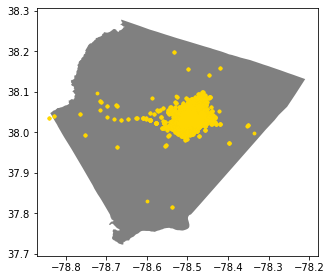

In [291]:
# cville = polys3[polys3['Name']=='Venable']
# cville.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys2.plot(ax=ax, facecolor='gray');
# cville.plot(ax=ax, facecolor='red');
gdf_full.plot(ax=ax, color='gold', markersize=8);
plt.tight_layout();

#looks like a lot in the county too... we'll see if we should drop them later
#even some OUT of the county


In [297]:
polys2

,Name,Description,geometry
0,10th & Page,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49092 38.03864 0.00000, ..."
1,UVA Fontaine,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.52320 38.02615 0.00000, ..."
2,Johnson Village,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49682 38.01781 0.00000, ..."
3,Barracks / Rugby,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.48911 38.05672 0.00000, ..."
4,UVA International Residential College,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50634 38.03960 0.00000, ..."
5,UVA Old Medical Grounds,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49829 38.03337 0.00000, ..."
6,UVA,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.49691 38.03302 0.00000, ..."
7,Locust Grove,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.45856 38.03448 0.00000, ..."
8,Belmont,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.46963 38.01178 0.00000, ..."
9,Fry's Spring,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-78.50322 38.02426 0.00000, ..."


In [322]:
pip_mask3 = gdf_full.within(polys2.loc[0, 'geometry'] | 
                            polys2.loc[1, 'geometry'] | 
                            polys2.loc[2, 'geometry'] | 
                            polys2.loc[3, 'geometry'] | 
                            polys2.loc[4, 'geometry'] | 
                            polys2.loc[5, 'geometry'] | 
                            polys2.loc[6, 'geometry'] | 
                            polys2.loc[7, 'geometry'] | 
                            polys2.loc[8, 'geometry'] | 
                            polys2.loc[9, 'geometry'] | 
                            polys2.loc[10, 'geometry'] | 
                            polys2.loc[11, 'geometry'] | 
                            polys2.loc[12, 'geometry'] | 
                            polys2.loc[13, 'geometry'] | 
#                             polys2.loc[14, 'geometry'] | items in the county
                            polys2.loc[15, 'geometry'] | 
                            polys2.loc[16, 'geometry'])

print(pip_mask3)

0          True
1          True
2          True
3          True
4         False
          ...  
107723     True
107724     True
107725     True
107726     True
107727     True
Length: 107728, dtype: bool


In [323]:
pip_mask3.value_counts()

True     58442
False    49286
dtype: int64

In [324]:
pip_data3 = gdf_full.loc[pip_mask3]
# pip_data3

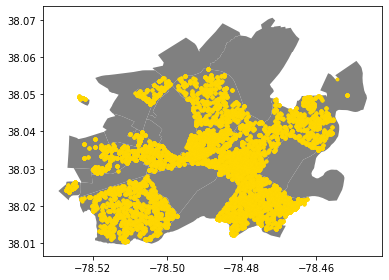

In [325]:
# cville = polys3[polys3['Name']=='Venable']
cville.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys3.plot(ax=ax, facecolor='gray');
# cville.plot(ax=ax, facecolor='red');
pip_data3.plot(ax=ax, color='gold', markersize=8);
plt.tight_layout();

In [326]:
pip_mask4 = gdf_full.within(polys2.loc[14, 'geometry'])


In [328]:
pip_mask4.value_counts()

False    103096
True       4632
dtype: int64

In [329]:
pip_data4 = gdf_full.loc[pip_mask4]
# pip_data3

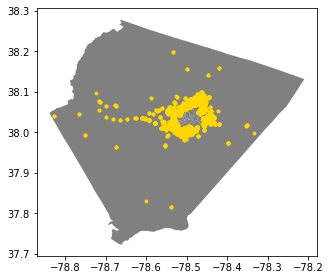

In [330]:
# cville = polys3[polys3['Name']=='Venable']
cville.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys2.plot(ax=ax, facecolor='gray');
# cville.plot(ax=ax, facecolor='red');
pip_data4.plot(ax=ax, color='gold', markersize=8);
plt.tight_layout();

In [360]:
pip_data5 = gdf_full.loc[gdf_full.Neigherborhood == '_Outside Albemarle County']

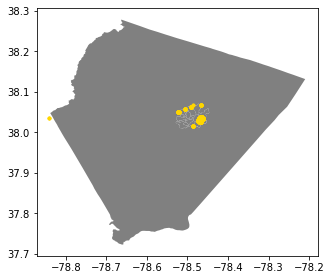

In [363]:
cville.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
polys2.plot(ax=ax, facecolor='gray');
# cville.plot(ax=ax, facecolor='red');
pip_data5.plot(ax=ax, color='gold', markersize=8);
plt.tight_layout();

In [368]:
long_haul = gdf_full.loc[(gdf_full.Neigherborhood == '_Outside Albemarle County') & (gdf_full['Total Response Time'] > 10)]

In [371]:
long_haul['Total Response Time'].describe()

count    569.000000
mean      12.363374
std        2.995814
min       10.020000
25%       10.610000
50%       11.340000
75%       12.820000
max       28.970000
Name: Total Response Time, dtype: float64